In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import pandas as pd
import seaborn as sns
from scipy.io import arff
import data_processing as dp
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

warnings.filterwarnings("ignore")

data = arff.loadarff("../../data/3year.arff")
df = pd.DataFrame(data[0])
df_origin = df.copy()

In [2]:
# Disable
def blockPrint():
    sys.stdout = open(os.devnull, "w")


# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

In [3]:
def logistic_regression_model(*args):
    X_train = args[0]
    X_test = args[1]
    y_train = args[2]
    y_test = args[3]

    # Reset indices to ensure alignment
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)

    logistic_model = LogisticRegression()

    logistic_model.fit(X_train, y_train)

    train_predictions = logistic_model.predict(X_train)
    test_predictions = logistic_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    precision_score_ = precision_score(y_test, test_predictions)
    recall_score_ = recall_score(y_test, test_predictions)
    f1_score_ = f1_score(y_test, test_predictions)

    print(classification_report(y_test, test_predictions))
    print(confusion_matrix(y_test, test_predictions))

    print(f"\nprecision_score: {precision_score_}")
    print(f"recall_score: {recall_score_}")
    print(f"train_accuracy: {train_accuracy}")
    print(f"test_accuracy: {test_accuracy}")
    print(f"f1score: {f1_score_}")

    return train_accuracy, test_accuracy

In [4]:
train_test_dataset = dp.pre_process(df)  # with SMOTE
print(f"X_train.shape: {train_test_dataset[0].shape}")

X_train.shape: (13978, 30)


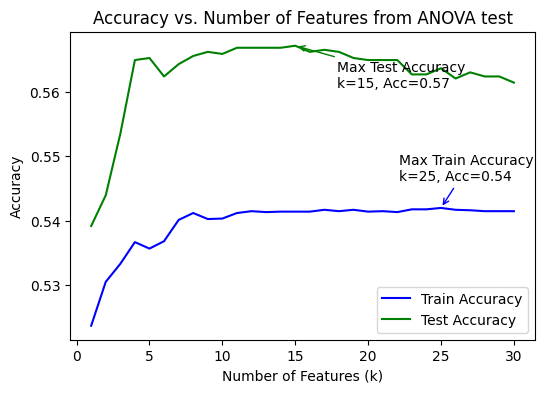

(0.541422234940621, 0.5671215487146938)

model metrics after ANOVA
              precision    recall  f1-score   support

           0       0.96      0.57      0.72      3017
           1       0.05      0.53      0.09       134

    accuracy                           0.57      3151
   macro avg       0.51      0.55      0.40      3151
weighted avg       0.93      0.57      0.69      3151

[[1716 1301]
 [  63   71]]

precision_score: 0.05174927113702624
recall_score: 0.5298507462686567
train_accuracy: 0.541422234940621
test_accuracy: 0.5671215487146938
f1score: 0.09428950863213811


In [5]:
blockPrint()
best_train_test_dataset = dp.find_best_k_features_from_ANOVA(
    logistic_regression_model, *train_test_dataset
)
enablePrint()

print("model metrics after ANOVA")
logistic_regression_model(*best_train_test_dataset)